### Importing Packages

In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing
import scipy.stats as stats
label_encoder = preprocessing.LabelEncoder()

### Loading dataset

In [75]:
mainframe = pd.read_csv("./Video_Games_Sales_as_at_22_Dec_2016.csv", encoding='utf-8')

In [76]:
mainframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


### Find Duplicate Values

In [77]:
mainframe.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16714    False
16715    False
16716    False
16717    False
16718    False
Length: 16719, dtype: bool

In [78]:
mainframe.duplicated().sum()

0

### Finding missing values

In [79]:
mainframe.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

### Removing all null value rows from Name, YOR, Genre and Publisher because the values are negligible

In [80]:
mainframe.dropna(subset=['Name'], inplace=True)
mainframe.dropna(subset=['Year_of_Release'], inplace=True)
mainframe.dropna(subset=['Genre'], inplace=True)
mainframe.dropna(subset=['Publisher'], inplace=True)

#### Removing the developer and rating features as they are categorical and have a lot of null values. They were also very much less contributing in the correlation matrix of EDA in phase 1 after label encoding.

In [81]:
mainframe = mainframe.drop('Developer', axis=1)
mainframe = mainframe.drop('Rating', axis=1)

### We cannot drop the other columns because they are essential and numerical.

#### Filling the missing values of numerical columns user score, user count, user score and user count with the median values. Median values are more robust to outliers compared to the mean method or ffill.

In [82]:
mainframe['Critic_Score'].fillna(mainframe['Critic_Score'].median(), inplace=True)
mainframe['Critic_Count'].fillna(mainframe['Critic_Count'].median(), inplace=True)
mainframe['User_Score'].fillna(mainframe['User_Score'].median(), inplace=True)
mainframe['User_Count'].fillna(mainframe['User_Count'].median(), inplace=True)

### Label Encoding the Categorical Features

#### One hot encoding is not done owing to increase in dimensionality of data and the model takes longer times to train with wavering results.

In [83]:
mainframe['Name']= label_encoder.fit_transform(mainframe['Name'])
mainframe['Name'].unique()
mainframe['Platform']= label_encoder.fit_transform(mainframe['Platform'])
mainframe['Platform'].unique()
mainframe['Genre']= label_encoder.fit_transform(mainframe['Genre'])
mainframe['Genre'].unique()
mainframe['Publisher']= label_encoder.fit_transform(mainframe['Publisher'])
mainframe['Publisher'].unique()

array([361, 325, 496, 457,  21, 527,  66, 139, 447, 468,  53,   6,  85,
       178, 277, 466, 459, 543, 290, 550, 530, 138, 428, 546, 145, 349,
       387, 217, 490, 165,  17, 294, 127,  91, 298, 426, 283,  40, 327,
       255, 121, 345,  10, 524, 393, 310, 240, 502,  13, 535, 332, 244,
       531, 464, 534,  63, 222, 110,  23, 380, 427, 540, 201, 202, 553,
       209, 101, 227,  94, 432, 488,  12,  18, 568, 461,   4, 350, 421,
        30,  71, 462, 161, 374, 567, 415,  88, 143, 475,  97, 436,  55,
       305, 452, 493,  27, 324, 402, 177, 514, 443, 275, 183, 511, 301,
       194, 336,  84, 498, 104, 467, 577, 400, 438, 416, 422, 528, 248,
       445, 343,  87, 465,   2, 226, 316, 367,  58,  67, 369, 516, 463,
       364, 458, 258, 279, 417, 236, 509, 434, 320, 307, 230, 171, 435,
       529, 196, 555,  61, 383, 518, 560, 281, 494, 235, 265, 147, 241,
        83, 484,  44, 123, 187, 326, 257,  36, 385, 556, 423, 216,  22,
       559, 547, 504, 370, 149,  60, 185, 274, 506, 306, 134, 49

### Plotting correlation matrix after incorporating changes

<AxesSubplot:>

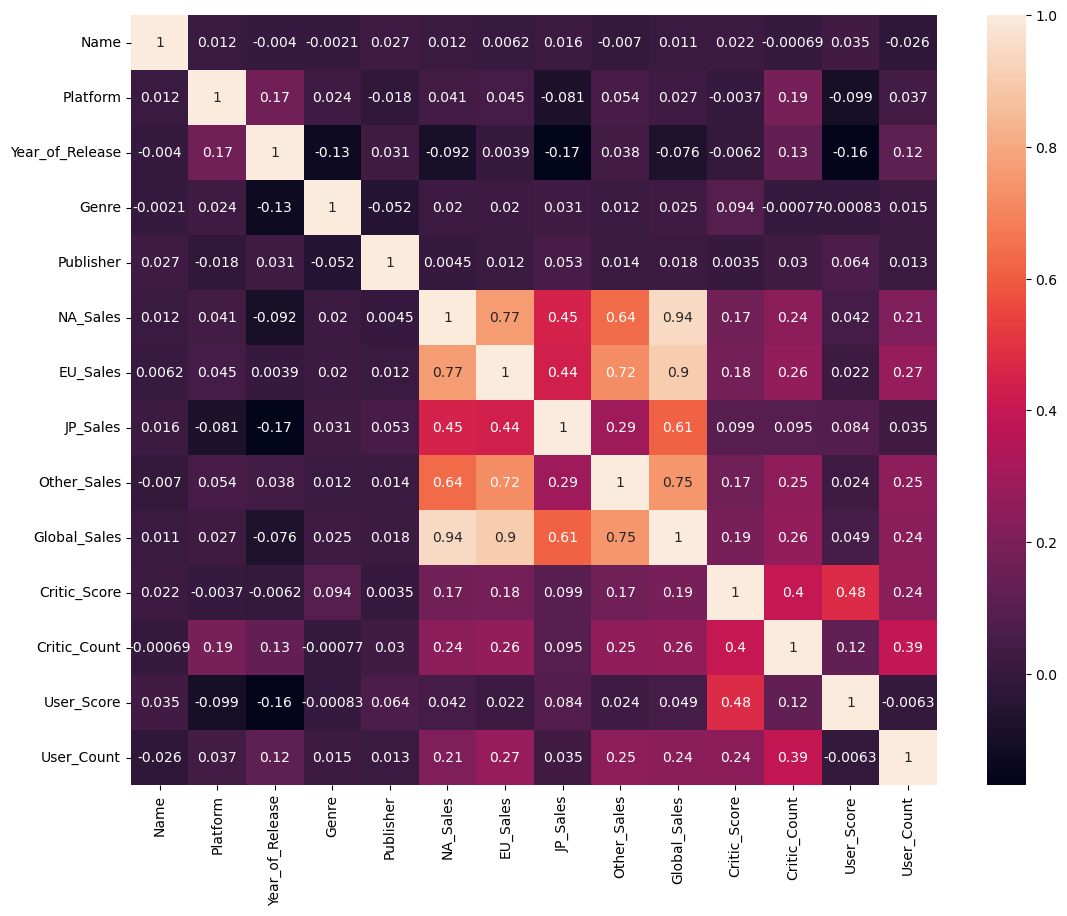

In [84]:
figsize = plt.figure(figsize= (13,10))
sns.heatmap(mainframe.corr(), annot=True)

#### NA_Sales, EU_Sales, JP_Sales, Other_Sales, Critic_Score, Critic_Count and User_Count have highest correlation with the Global_Sales which is to be predicted.

### Making Train test split using the features and variable to be predicted

In [85]:
X = mainframe[['NA_Sales', 'EU_Sales', 'JP_Sales' , 'Critic_Score', 'Critic_Count', 'User_Count']]
y = mainframe['Global_Sales'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Scaling the data using Standard Scaler

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Sales Prediction using Regression 

### 1) Decision Tree Regression

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [58]:
dtregression = DecisionTreeRegressor(max_depth = 3)

# fitting model on the training data
dtregression.fit(X_train, y_train)

# predictions made on the test data
y_pred = dtregression.predict(X_test)

# Metrics to evaluate the model 
meansqerror = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
meanabserror = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error is :", meansqerror)
print("R-squared Score is :", r2score)
print("Mean Absolute Error is : ", meanabserror)


Mean Squared Error is : 0.9062652841401726
R-squared Score is : 0.7464149177100221
Mean Absolute Error is :  0.2422509403828558


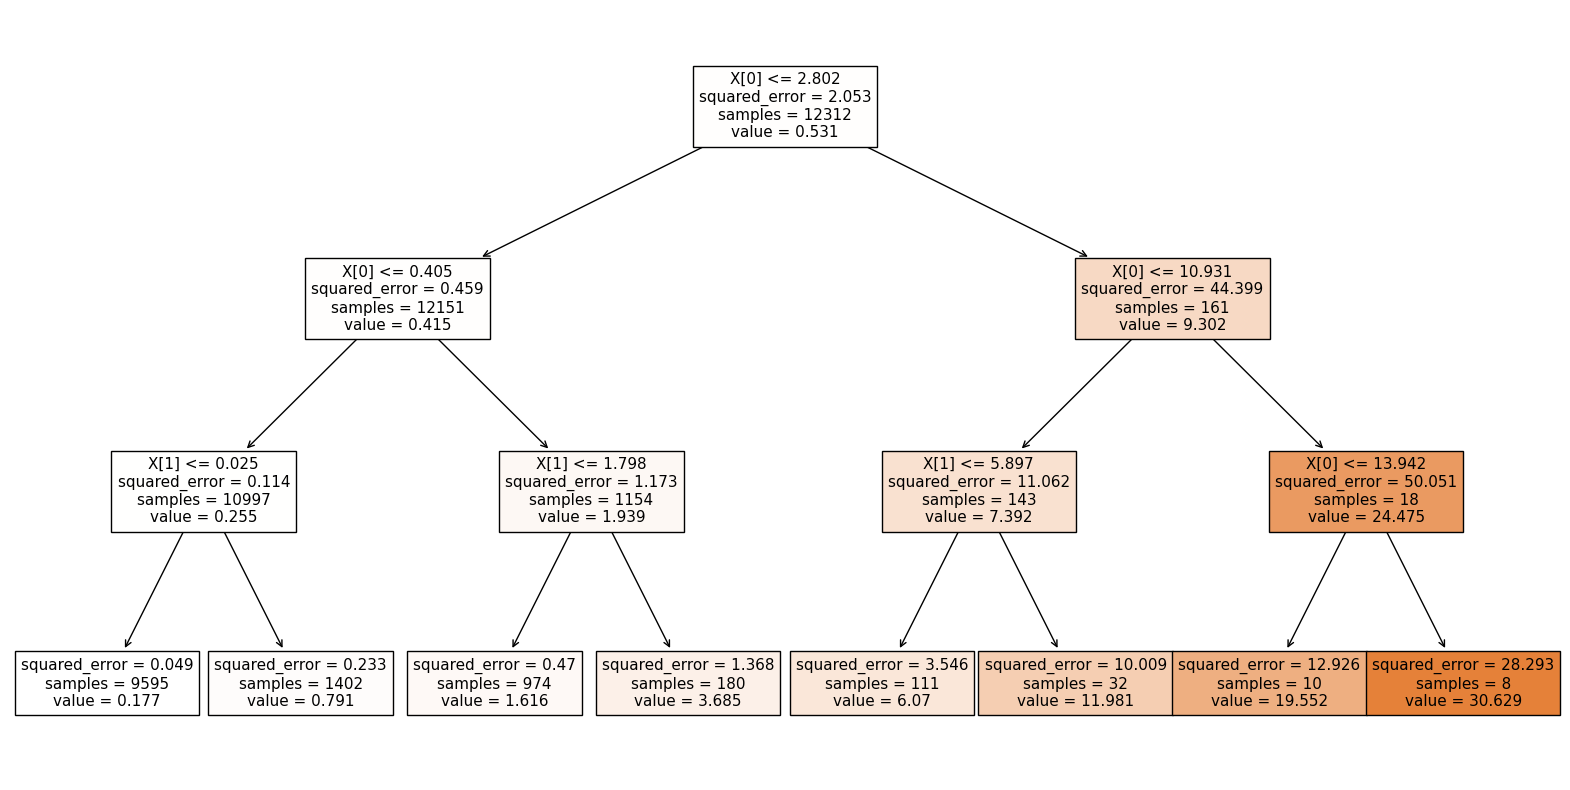

In [59]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtregression, filled=True)
plt.show()

### Trying to tune performance of the decision tree by increasing the tree depth to 6

In [60]:
dtregression = DecisionTreeRegressor(max_depth = 6)

# fitting model on the training data
dtregression.fit(X_train, y_train)

# predictions made on the test data
y_pred = dtregression.predict(X_test)

# Metrics to evaluate the model 
meansqerror = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
meanabserror = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error is :", meansqerror)
print("R-squared Score is :", r2score)
print("Mean Absolute Error is : ", meanabserror)

Mean Squared Error is : 0.5207660208708131
R-squared Score is : 0.8542827397590969
Mean Absolute Error is :  0.12842809931737076


#### We can See that the MSE and MAE have decreased which is indicative of improvement in the regression performance, while the R Squared score has decreased which is also indicative of higher performing model which accurately predicts sales.

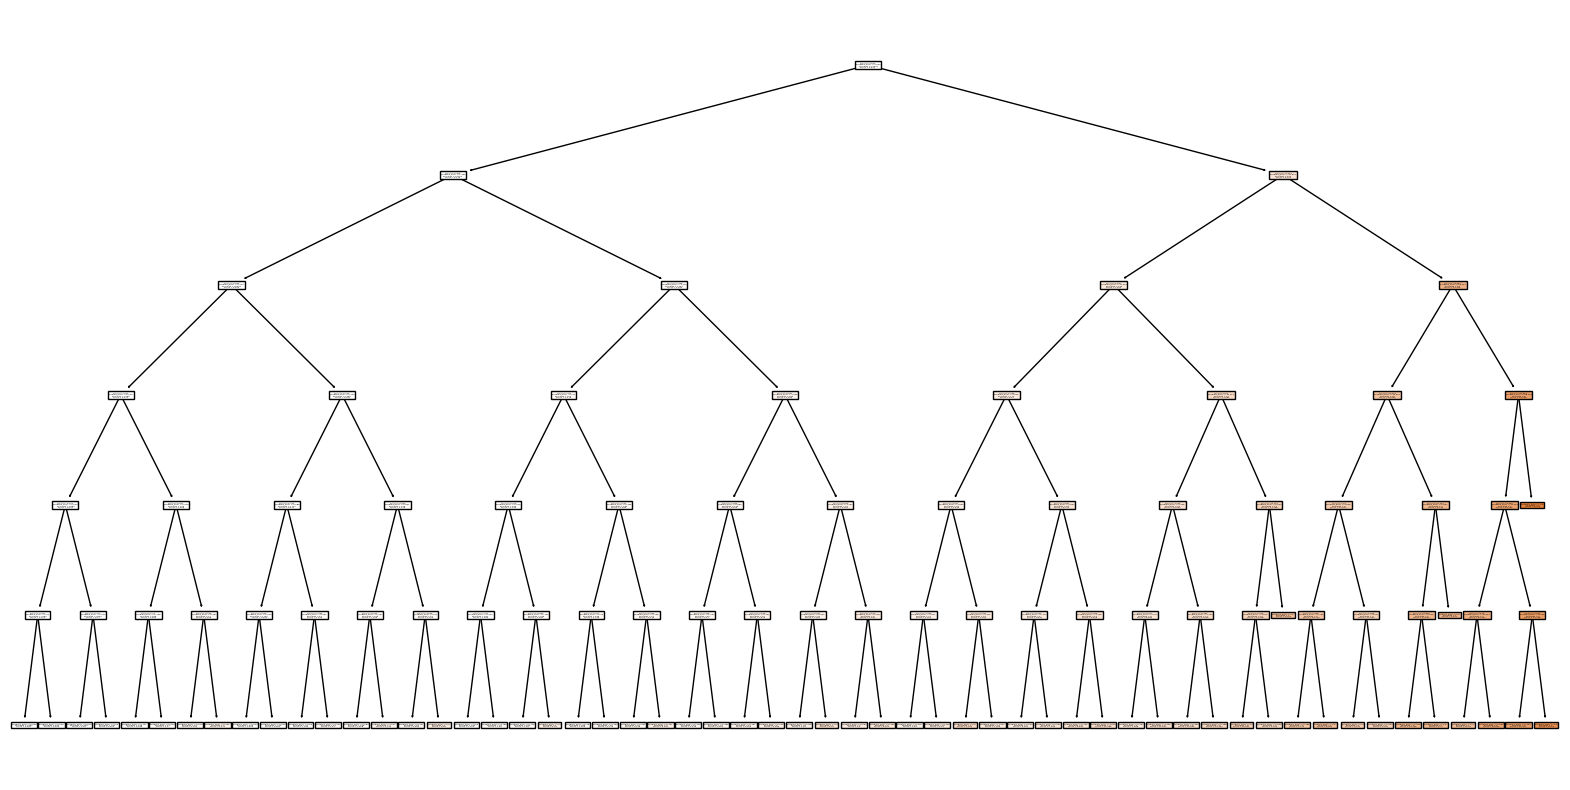

In [61]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtregression, filled=True)
plt.show()

## 2) Random Forest Regression

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rforestregressor = RandomForestRegressor(n_estimators=50, random_state=42)
rforestregressor.fit(X_train, y_train)

# predictions made on the test data
y_pred = rforestregressor.predict(X_test)

# Metrics to evaluate the model 
meansqerror = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
meanabserror = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error is :", meansqerror)
print("R-squared Score is :", r2score)
print("Mean Absolute Error is : ", meanabserror)

Mean Squared Error is : 0.5865960286233735
R-squared Score is : 0.8358626278721883
Mean Absolute Error is :  0.04574701015393995


#### Immediately we can see the MSE and MAE has dropped compared to first iteration of decision tree and then teh R Squared value has increased

### Tuning performance of the Random Forest Reg by increasing the number of decision trees n_estimators to 100

In [64]:
rforestregressor = RandomForestRegressor(n_estimators=100, random_state=42)
rforestregressor.fit(X_train, y_train)

# predictions made on the test data
y_pred = rforestregressor.predict(X_test)

# Metrics to evaluate the model 
meansqerror = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
meanabserror = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error is :", meansqerror)
print("R-squared Score is :", r2score)
print("Mean Absolute Error is : ", meanabserror)

Mean Squared Error is : 0.5783502633372146
R-squared Score is : 0.83816990269031
Mean Absolute Error is :  0.04539388987416079


#### The increase in the number of decision trees for the random forests have increased the performance of the model with the MSE, MAE decreasing and the R Squared value increasing albeit a short amount.

### Feature Importance Graph for the Features contribution in RF Regression

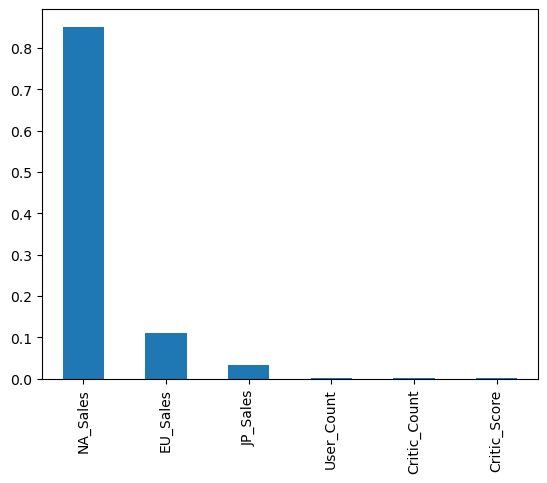

In [70]:
importances = rforestregressor.feature_importances_
attributefeatures = X.columns

feat_importances = pd.Series(importances, index=attributefeatures).nlargest(15).plot(kind='bar')

## 3) SUPPORT VECTOR MACHINE REGRESSION

In [66]:
from sklearn.svm import SVR

In [67]:
# Need to Initialise the model first
svreg = SVR(kernel='rbf', C=1.0, epsilon=0.1)

svreg.fit(X_train, y_train)

# predictions made on the test data
y_pred = svreg.predict(X_test)

# Metrics to evaluate the model 
meansqerror = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
meanabserror = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error is :", meansqerror)
print("R-squared Score is :", r2score)
print("Mean Absolute Error is : ", meanabserror)

Mean Squared Error is : 2.1598041172444007
R-squared Score is : 0.3956580767393243
Mean Absolute Error is :  0.13445271274266726


#### We can see that the MSE has increased significantly, the MAE is good and the R Squared score is a bit low.

### Experiment Tuning performance of the SVR by changing the kernel and the value of C

In [68]:
# Need to Initialise the model first
svreg = SVR(kernel='linear', C= 2.0, epsilon=0.1)

svreg.fit(X_train, y_train)

# predictions made on the test data
y_pred = svreg.predict(X_test)

# Metrics to evaluate the model 
meansqerror = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
meanabserror = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error is :", meansqerror)
print("R-squared Score is :", r2score)
print("Mean Absolute Error is : ", meanabserror)

Mean Squared Error is : 0.005799284073843149
R-squared Score is : 0.9983772831699234
Mean Absolute Error is :  0.04089731006830103


#### There is a drastic difference in the performance of the system with really low MSE, MAE and a really good value for R square


### Actual vs Predicted values of regression graph

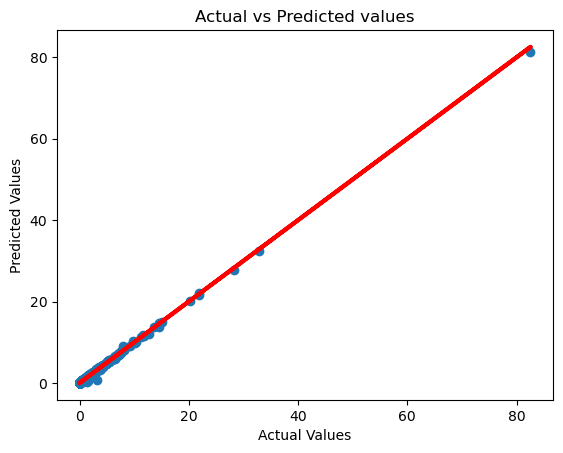

In [71]:
plt.plot(y_test, y_test, color='red', linewidth=3)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted values')
plt.show()

#### This is indicative of overfitting as all the points are on the line. So, increasing the learning rate and kernel was changed to linear

## 4) Neural Network ( Basic Sequential Model)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
nnmodel = Sequential()
nnmodel.add(Dense(16, input_shape=(6,), activation='relu'))
nnmodel.add(Dense(8, activation='relu'))
nnmodel.add(Dense(1, activation='linear'))

nnmodel.compile(optimizer='adam', loss='mean_squared_error')

history = nnmodel.fit(X_train, y_train, batch_size=32, epochs=25, validation_split=0.30)

finalres = nnmodel.evaluate(X_test, y_test)


y_pred = nnmodel.predict(X_test)

Epoch 1/25
270/270 [==============================] - 1s 1ms/step - loss: 2.1193 - val_loss: 2.5123
Epoch 2/25
270/270 [==============================] - 0s 869us/step - loss: 1.0984 - val_loss: 0.8807
Epoch 3/25
270/270 [==============================] - 0s 863us/step - loss: 0.2712 - val_loss: 0.1127
Epoch 4/25
270/270 [==============================] - 0s 867us/step - loss: 0.0625 - val_loss: 0.0381
Epoch 5/25
270/270 [==============================] - 0s 867us/step - loss: 0.0389 - val_loss: 0.0238
Epoch 6/25
270/270 [==============================] - 0s 889us/step - loss: 0.0314 - val_loss: 0.0181
Epoch 7/25
270/270 [==============================] - 0s 935us/step - loss: 0.0288 - val_loss: 0.0204
Epoch 8/25
270/270 [==============================] - 0s 860us/step - loss: 0.0266 - val_loss: 0.0165
Epoch 9/25
270/270 [==============================] - 0s 863us/step - loss: 0.0262 - val_loss: 0.0156
Epoch 10/25
270/270 [==============================] - 0s 867us/step - loss: 0.0255 

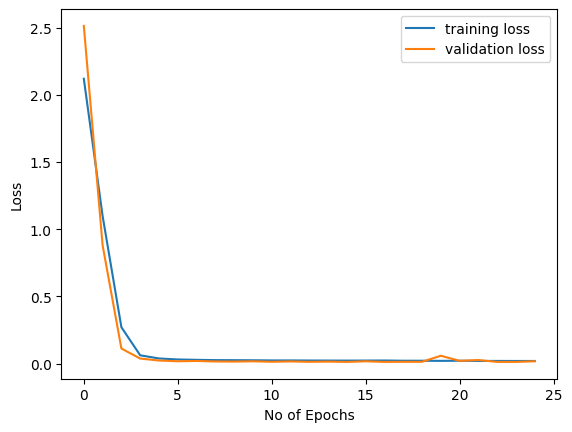

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Changing the test Size to 30% to combat overfitting

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Perform Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
nnmodel = Sequential()
nnmodel.add(Dense(16, input_shape=(6,), activation='relu'))
nnmodel.add(Dense(8, activation='relu'))
nnmodel.add(Dense(1, activation='linear'))

nnmodel.compile(optimizer='adam', loss='mean_squared_error')

history = nnmodel.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.30)

finalres = nnmodel.evaluate(X_test, y_test)

y_pred = nnmodel.predict(X_test)

Epoch 1/50
270/270 [==============================] - 1s 1ms/step - loss: 1.5563 - val_loss: 1.3540
Epoch 2/50
270/270 [==============================] - 0s 867us/step - loss: 0.4742 - val_loss: 0.1716
Epoch 3/50
270/270 [==============================] - 0s 854us/step - loss: 0.0953 - val_loss: 0.0584
Epoch 4/50
270/270 [==============================] - 0s 857us/step - loss: 0.0553 - val_loss: 0.0444
Epoch 5/50
270/270 [==============================] - 0s 849us/step - loss: 0.0414 - val_loss: 0.0373
Epoch 6/50
270/270 [==============================] - 0s 921us/step - loss: 0.0361 - val_loss: 0.0321
Epoch 7/50
270/270 [==============================] - 0s 838us/step - loss: 0.0331 - val_loss: 0.0263
Epoch 8/50
270/270 [==============================] - 0s 848us/step - loss: 0.0321 - val_loss: 0.0260
Epoch 9/50
270/270 [==============================] - 0s 875us/step - loss: 0.0298 - val_loss: 0.0228
Epoch 10/50
270/270 [==============================] - 0s 851us/step - loss: 0.0286 

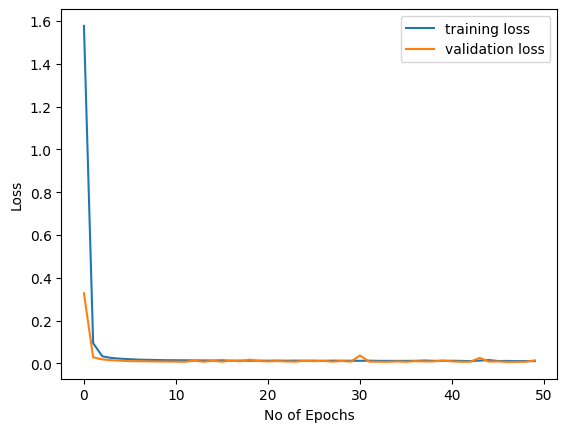

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Trying to Tune with the sgd optimizer

In [19]:
from keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
nnmodel = Sequential()
nnmodel.add(Dense(128, input_shape=(6,), activation='relu'))
nnmodel.add(Dense(64, activation='relu'))
nnmodel.add(Dense(32, activation='relu'))
nnmodel.add(Dense(1, activation='linear'))

sgdoptimizer = SGD(lr=0.01, momentum=0.9)
nnmodel.compile(optimizer=sgdoptimizer, loss='mean_squared_error')

history = nnmodel.fit(X_train, y_train, batch_size=32, epochs=25, validation_split=0.30)

finalres = nnmodel.evaluate(X_test, y_test)

y_pred = nnmodel.predict(X_test)

Epoch 1/25
270/270 [==============================] - 1s 1ms/step - loss: 0.7699 - val_loss: 0.0333
Epoch 2/25
270/270 [==============================] - 0s 888us/step - loss: 0.4884 - val_loss: 1.8461
Epoch 3/25
270/270 [==============================] - 0s 919us/step - loss: 0.3178 - val_loss: 1.9109
Epoch 4/25
270/270 [==============================] - 0s 893us/step - loss: 0.5722 - val_loss: 1.4406
Epoch 5/25
270/270 [==============================] - 0s 907us/step - loss: 0.3900 - val_loss: 1.3320
Epoch 6/25
270/270 [==============================] - 0s 885us/step - loss: 0.4728 - val_loss: 1.1213
Epoch 7/25
270/270 [==============================] - 0s 881us/step - loss: 0.3592 - val_loss: 0.9655
Epoch 8/25
270/270 [==============================] - 0s 874us/step - loss: 0.3456 - val_loss: 0.8913
Epoch 9/25
270/270 [==============================] - 0s 867us/step - loss: 0.2976 - val_loss: 0.9963
Epoch 10/25
270/270 [==============================] - 0s 870us/step - loss: 0.3180 

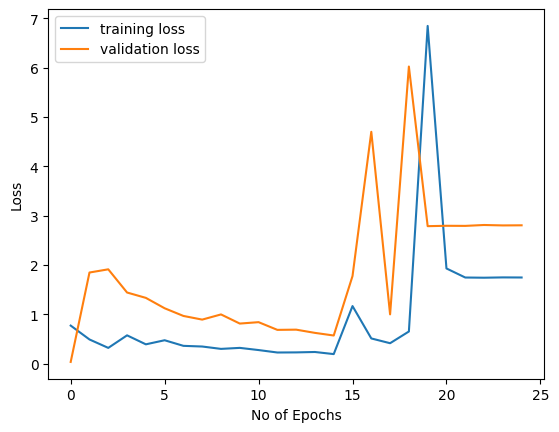

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### unpredictable behaviour for validation loss

## 5) Gradient Boosting Regressor

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

### Tuning the performance of the Gradient Boosting Regressor by changing the number of n_estimators and learning rate

In [95]:
# re splitting the test train split as the instance was changed int the past model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Perform Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

gradientboost = GradientBoostingRegressor(n_estimators=100, max_depth= 6, learning_rate=0.1)
gradientboost.fit(X_train, y_train)

# predictions made on the test data
y_pred = gradientboost.predict(X_test)

# Metrics to evaluate the model 
meansqerror = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
meanabserror = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error is :", meansqerror)
print("R-squared Score is :", r2score)
print("Mean Absolute Error is : ", meanabserror)

Mean Squared Error is : 0.5129448443627879
R-squared Score is : 0.8564712089889138
Mean Absolute Error is :  0.04713099786609272


#### That is pretty good numbers for the MSE, R SQUARED Value and MAE. But the MSE is a bit higher.

### Experimenting Tuning with reducing n_estimators, decreasing max_depth and increasing learning rate

In [96]:
gradientboost = GradientBoostingRegressor(n_estimators=50, max_depth=5, learning_rate=0.2)
gradientboost.fit(X_train, y_train)

# predictions made on the test data
y_pred = gradientboost.predict(X_test)

# Metrics to evaluate the model 
meansqerror = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
meanabserror = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error is :", meansqerror)
print("R-squared Score is :", r2score)
print("Mean Absolute Error is : ", meanabserror)

Mean Squared Error is : 0.49934024991485126
R-squared Score is : 0.8602779554934705
Mean Absolute Error is :  0.04919138210809643


#### The mean square error deccreases while the R-squared value increases, bu the MAE error increases a bit which means lesser noise than before

### we can see that the performance has improved for the model compared to an increased amount in n_estimators and max_depth

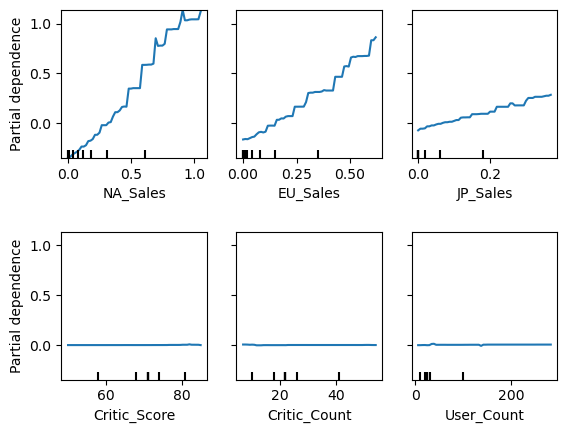

In [91]:
from sklearn.inspection import plot_partial_dependence
features = ['NA_Sales', 'EU_Sales', 'JP_Sales' , 'Critic_Score', 'Critic_Count', 'User_Count'] 
plot_partial_dependence(gradientboost, X_train, features, n_jobs=-1, grid_resolution=60, response_method='auto')
plt.subplots_adjust(hspace=0.5)
plt.show()

### all the cores are utilised for the job and the method for the response is auto for regression.

### NA_sales, EU_Sales, JP_Sales are dependent